#### Adapative linear neurons (Adaline)

- Adaliine algorith, illustrates the key conceptes of defining and minimizing continuous cost functions.

 - The key difference between the Adaline rule and Rosenbatt's perceptron is that the weights are updated based on  a linear activation functin rather than a unit step function.

- While the linear activation function is used for learning the weights, we still use the threshold function to make the final predictions, which is similart to the unit step fucntion like in preceptron.

- The main difference between the perceptron and Adaline algorithm are highlighted below:


<p align="center">
  <img src="./markdown-images/perceptron_vs_adaline.png" width="800" />
</p>

- The Adaline algorithm compares the true class labels with the linear activation functions's continuous valued ouput to compute the model error and update the weights. In contrast, the preceptron compares the true class labels to the predicted class labels.




#### Minimizing cost functions with gradient descent
 
 One of the key ingredients of supervised machine learning algorithms is a defined objective function that is to be optimized during the learning process. The objective fucntion is often a cost function that is to be minimized during the training process.

 In Adaline, the cost function is defined as the sum of **squared errors (SSE)**, between the calculated outcome nad the true class label:

 $ J(w) = \frac{1}{2} \sum_{i} (y^{(i)} - \phi (z^{(i)})) ^ 2 $

 The main advantage of this continuous linear activation function, in contrast to the unit step function, is that the function becomes differentiable. We can use a very simple yet powerful optimization algorithm called **gradient descent** to find the weights that minimize our cost function.

We can describe the idea behind the gradient descent as climibing down a hill until a local or global cost minimum is reached. In each iteration, we take a step in the opposite direction of the gradient, where the step size is defined by the value of the learning rate.}

<p align="center">
  <img src="./markdown-images/gradeint_descent.png" width="800" />
</p>


Using the gradient descent, we can now update the weights by taking a step in the opposite direction of the gradient, $ \nabla J(w) $, of our cost function $ J(w) $:
$ w := w + \Delta w $

The weight change, $ \Delta w $, is defined as the negative gradient multiplied by the learning rate, $ \eta $:

$ \Delta w = - \eta \nabla J(w) $ 

To compute the gradinet of the cost function, we need to compute the partial derivative of the cost fucntion with respect to each weight, $ w_j $:

$ \frac{\delta J}{\delta w_j} = - \sum_{i} (y ^ {(i)} - \phi (z ^ {(i)})) x_j ^ {(i)}$

So we can write the update weight $w_j$ as: <br/>
 $\nabla w_j = - \eta \frac{\delta J}{\delta w_j} = \eta \sum_{i} (y ^ {(i)} - \phi (z ^ {(i)})) x_j ^ {(i)}$

 Although the Adaline learning rule looks identical to the preceptron rule, we should note that $ \phi (z ^ {(i)})$  with $z^{(i)} = w^T x^{(i)}$ is a real number and not an integer class label. Also, the weight is updated based on all exampleas in the traning dataset instead of updating the weights incrementally after each training example, which is why this approach is also referred to as **batch gradient descent**.

In [27]:
import pandas as pd
import numpy as np
import os

filepath = os.path.join('./data', 'iris.data')
df = pd.read_csv(filepath, header=None, encoding='utf-8') 

In [28]:
## Select the first 100 data
labels = df.iloc[0:100, 4].values
labels = np.where(labels == 'Iris-setosa', -1, 1)
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [29]:
features = df.iloc[0:100, [0,2]].values
features

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

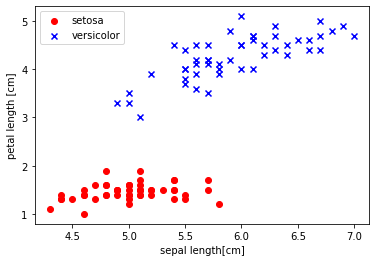

In [30]:
import matplotlib.pyplot as plt
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, train_size = .75)

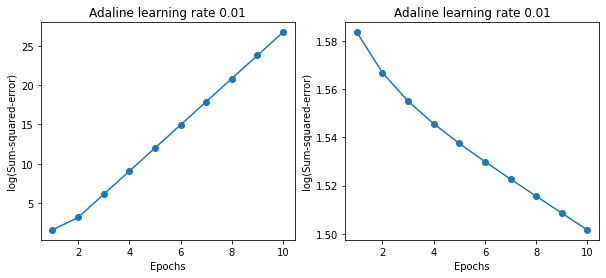

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from adaline import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(learning_rate=0.01, n_iter=10).fit(X_train, y_train)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline learning rate 0.01')

ada2 = AdalineGD(learning_rate=0.0001, n_iter=10).fit(X_train, y_train)

ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline learning rate 0.01')


plt.show()

In [33]:
def accuracy_metric(trained_perceptron, test_features, test_labels):
    correct_predictions = 0
    total_predictions = len(test_labels)
    for X, label in zip(test_features, test_labels):
        predicted_label = trained_perceptron.predict(X)
        if label == predicted_label:
            correct_predictions += 1
    
    accuracy = (correct_predictions/total_predictions) * 100
    return accuracy

In [34]:
accuracy = accuracy_metric(ada2, X_test, y_test)
print(f"Accuracy = {accuracy}")

Accuracy = 48.0


#### Improving gradient descent through feature scaling

**Feature Scaling** is a statistical technique which scales the features of our data so that they all have a similar range.

Here, we will use feature scaling method called **standardization**, which gives our data the properties of a standerd normal distribution. This normalization technique helps gradient descent to converge more quickly; however, it does not make the original dataset normally distributed. Standarizaton shifts the mean of each feature so that it is centered at zero and each feature has a standard deviationof 1 (unit variance). For instance, to standaridize the $jth$ feature, we can simply subtract the sample mean, $\mu_j$ from every trainig example and divide it by its standard deviation, $\sigma_j$

$x_j ^{'} = \frac{x_j - \mu_j}{\sigma_j}$

One of the reasons why standardization helps with gradinet descent is that the optimzer has to go through fewer steps to find the good or optimal solution.



In [35]:
X_std = np.copy(X_train)
# X_train[:,0].mean()
# X_train[:, 0].std()
X_std[:, 0] = (X_train[:, 0] - X_train[:, 0].mean() ) / X_train[:, 0].std()
X_std[:, 1] = (X_train[:, 1] - X_train[:, 1].mean() ) / X_train[:, 1].std()

In [36]:
ada_gd = AdalineGD(n_iter=15, learning_rate=0.01)
ada_gd.fit(X_std, y_train)

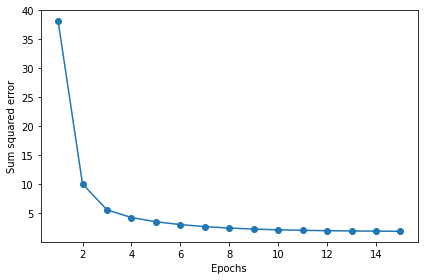

In [37]:
import matplotlib.pyplot as plt


plt.plot(range(1, len(ada_gd.cost_) + 1 ), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum squared error')
plt.tight_layout()
plt.show()

Here, we can see that the Adaline has now converged adter training on the standarized features using a learning rate of $\eta = 0.01$